### **Preventing Underfiting and Overfiting** 

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [3]:
X,y = make_classification(n_samples=9000, n_features=18, n_informative= 4,  n_redundant=12,random_state=4)


In [4]:
X_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


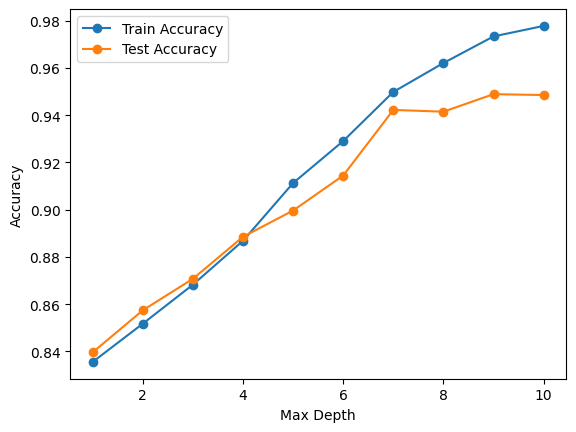

In [7]:
train_scores, test_scores = [],[]
for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(x_test)))
plt.plot(range(1, 11), train_scores, '-o', label='Train Accuracy')
plt.plot(range(1, 11), test_scores,'-o' ,label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# model = DecisionTreeClassifier(max_depth=3)
# model.fit(X_train, y_train)
# print('Train Accuracy:', accuracy_score(y_train, model.predict(X_train)))
# print('Test Accuracy:', accuracy_score(y_test, model.predict(x_test)))




In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini', ' entropy',], 'max_depth':[2,4,5,6,10,20], 'min_samples_split': [5, 10, 20, 50, 100]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs= -1, scoring='accuracy')
grid_search.fit(X_train, y_train)


c:\ProgramData\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
97 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\ProgramData\miniconda3\envs\Python_ML\Lib\

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', ' entropy'], 'max_depth': [2, 4, ...], 'min_samples_split': [5, 10, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [13]:
# print the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


In [ ]:
#print  the accuracy 
print('Train Accuracy:', accuracy_score(y_train, grid_search.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, grid_search.predict(x_test)))

Train Accuracy: 0.9758730158730159
Test Accuracy: 0.9507407407407408
